<a href="https://colab.research.google.com/github/harshithap99/ripefruitidentification/blob/master/Flowers1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import cv2    
from tqdm import tqdm
import random as random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.models import Sequential
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


Using TensorFlow backend.


In [0]:
predicters = []
target = []
IMG_SIZE=150
daisy_dir='/content/drive/My Drive/flowers/daisy'
sunflower_dir='/content/drive/My Drive/flowers/sunflower'
tulip_dir='/content/drive/My Drive/flowers/tulip'
dandelion_dir='/content/drive/My Drive/flowers/dandelion'
rose_dir='/content/drive/My Drive/flowers/rose'

In [0]:
def read_image(label,DIR):
    
    for img in tqdm(os.listdir(DIR)):
    #for img in DIR:
        path = os.path.join(DIR,img)
        
        _, ftype = os.path.splitext(path)
        if ftype == ".jpg":
       
            image = cv2.imread(path,cv2.IMREAD_COLOR)
            image = cv2.resize(image, (IMG_SIZE,IMG_SIZE),interpolation = cv2.INTER_AREA)
            predicters.append(np.array(image))
            target.append(str(label))

read_image("Daisy",daisy_dir)
read_image("Sunflower",sunflower_dir)
read_image("Tulip",tulip_dir)
read_image("Dandelion",dandelion_dir)
read_image("Rose",rose_dir)

100%|██████████| 784/784 [02:57<00:00,  4.41it/s]


In [0]:
encoder = LabelEncoder()

X = np.array(predicters)
print(X)
X = X/255
print(X)
print(target)
y = encoder.fit_transform(target)
y = to_categorical(y,5)

print(X.shape)
print(y.shape)

[[[[117 129 133]
   [111 124 124]
   [103 112 114]
   ...
   [144 167 164]
   [142 168 164]
   [129 155 144]]

  [[116 125 127]
   [101 110 109]
   [ 92  95  99]
   ...
   [130 146 143]
   [134 152 148]
   [122 141 131]]

  [[106 110 110]
   [ 95  96  97]
   [ 85  77  86]
   ...
   [115 131 125]
   [115 131 126]
   [114 130 120]]

  ...

  [[ 41  12  28]
   [ 41  12  28]
   [ 40  11  27]
   ...
   [ 83  24  49]
   [ 82  21  49]
   [ 85  22  51]]

  [[ 40  11  27]
   [ 39  10  26]
   [ 40  11  27]
   ...
   [ 83  23  51]
   [ 86  25  53]
   [ 87  25  53]]

  [[ 38   9  24]
   [ 37   8  23]
   [ 40  11  26]
   ...
   [ 83  23  52]
   [ 85  24  52]
   [ 84  22  49]]]


 [[[223 216 212]
   [221 214 210]
   [225 216 214]
   ...
   [ 17  12  12]
   [ 15  10  10]
   [ 13   8   8]]

  [[227 220 218]
   [230 222 220]
   [225 218 215]
   ...
   [ 15  12  13]
   [ 13   8   9]
   [ 12   7   7]]

  [[235 226 226]
   [232 224 221]
   [230 225 222]
   ...
   [ 15  13  13]
   [ 15  10  11]
   [ 13   8

In [0]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.2,random_state=42)
X_train.shape,y_train.shape,X_valid.shape,y_valid.shape,X_test.shape,y_test.shape

((2772, 150, 150, 3),
 (2772, 5),
 (867, 150, 150, 3),
 (867, 5),
 (694, 150, 150, 3),
 (694, 5))

In [0]:
batch_size = 64
epochs = 20
num_classes = y.shape[1]

In [0]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',padding='same',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPool2D((2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128,kernel_size= (3, 3), activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(num_classes, activation='softmax'))


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 38, 38, 128)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 38, 38, 128)      

In [0]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [0]:
imagegen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                            rotation_range=60,
                              zoom_range=0.1,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              fill_mode='reflect')
imagegen.fit(X_train)

In [0]:
model_dropout = model.fit_generator(imagegen.flow(X_train,y_train, batch_size=batch_size),epochs=epochs,verbose=1,
                          validation_data=(X_valid, y_valid),steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/20
43/43 [==============================] - 224s 5s/step - loss: 1.8143 - accuracy: 0.4516 - val_loss: 3.0614 - val_accuracy: 0.2226
Epoch 2/20
43/43 [==============================] - 220s 5s/step - loss: 1.2051 - accuracy: 0.5462 - val_loss: 3.3463 - val_accuracy: 0.2226
Epoch 3/20
43/43 [==============================] - 218s 5s/step - loss: 1.1675 - accuracy: 0.5576 - val_loss: 1.8149 - val_accuracy: 0.1892
Epoch 4/20
43/43 [==============================] - 224s 5s/step - loss: 1.0718 - accuracy: 0.5831 - val_loss: 4.5590 - val_accuracy: 0.2226
Epoch 5/20
43/43 [==============================] - 220s 5s/step - loss: 0.9805 - accuracy: 0.6256 - val_loss: 2.9922 - val_accuracy: 0.2226
Epoch 6/20
43/43 [==============================] - 218s 5s/step - loss: 0.9787 - accuracy: 0.6300 - val_loss: 2.5295 - val_accuracy: 0.2226
Epoch 7/20
43/43 [==============================] - 218s 5s/step - loss: 0.8635 - accuracy: 0.6610 - val_loss: 2.0908 - val_accuracy: 0.2284
Epoch 8/20
43

In [0]:
test_eval = model.evaluate(X_test, y_test, verbose=1)

694/694 [==============================] - 13s 19ms/step


In [0]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1).astype(int)

y_true = np.argmax(y_test,axis = 1).astype(int)

In [0]:
corr=[]
incorr=[]
corr_count=0
incorr_count=0

for i in range(len(y_test)):
    if(y_pred[i]==y_true[i]):
        corr.append(i)
        corr_count+=1
    else:
        incorr.append(i)
        incorr_count+=1
        
print("Found %d correct flowers" %(corr_count))
print("Found %d incorrect flowers" %(incorr_count))

Found 504 correct flowers
Found 190 incorrect flowers


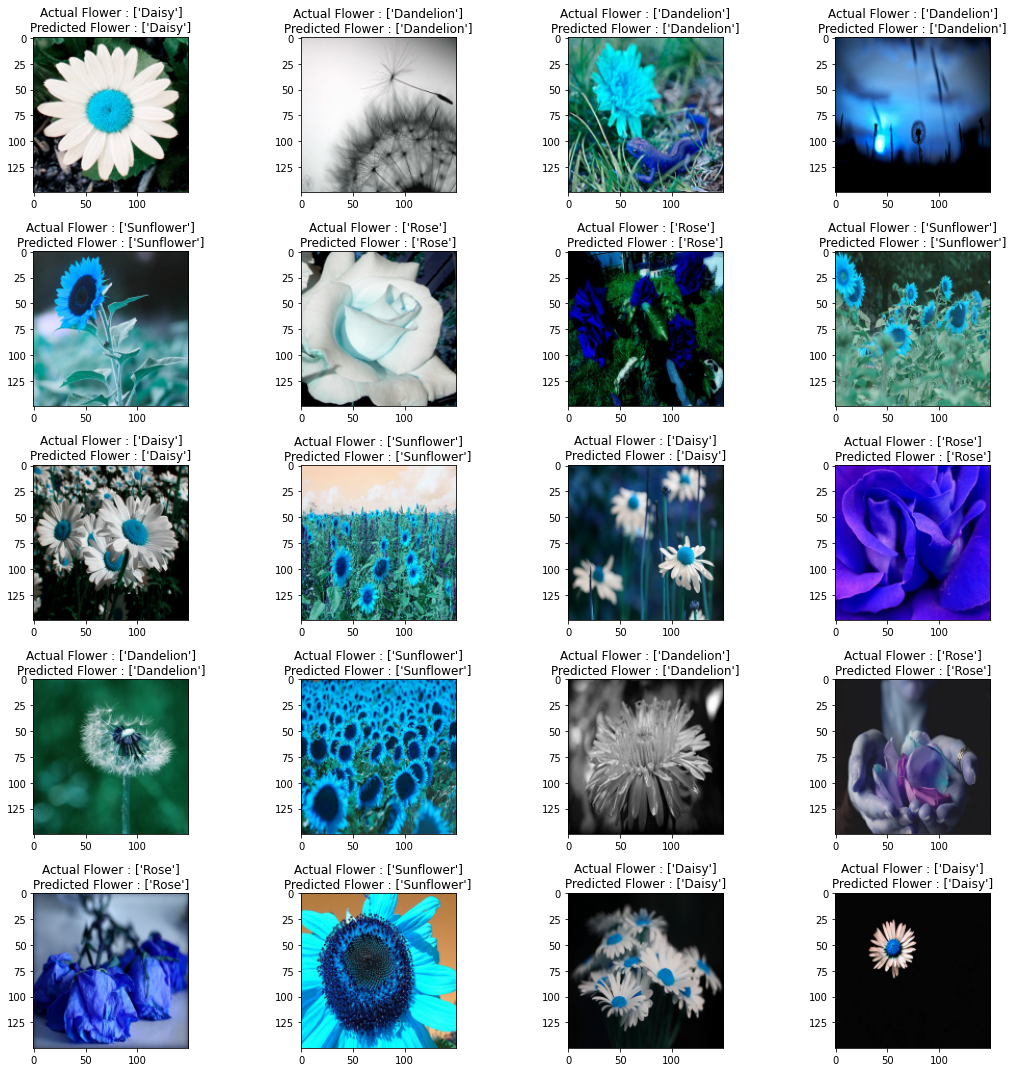

In [0]:
fig,ax = plt.subplots(num_classes,4)
fig.set_size_inches(15,15)

count = 0
for i in range (num_classes):
    for j in range (4):
        
        ax[i,j].imshow(X_test[corr[count]])
        
        ax[i,j].set_title("Actual Flower : "+str(encoder.inverse_transform([y_true[corr[count]]])) +  "\n" + "Predicted Flower : "+str(encoder.inverse_transform([y_pred[corr[count]]])))
        
        count+=1
        
plt.tight_layout()

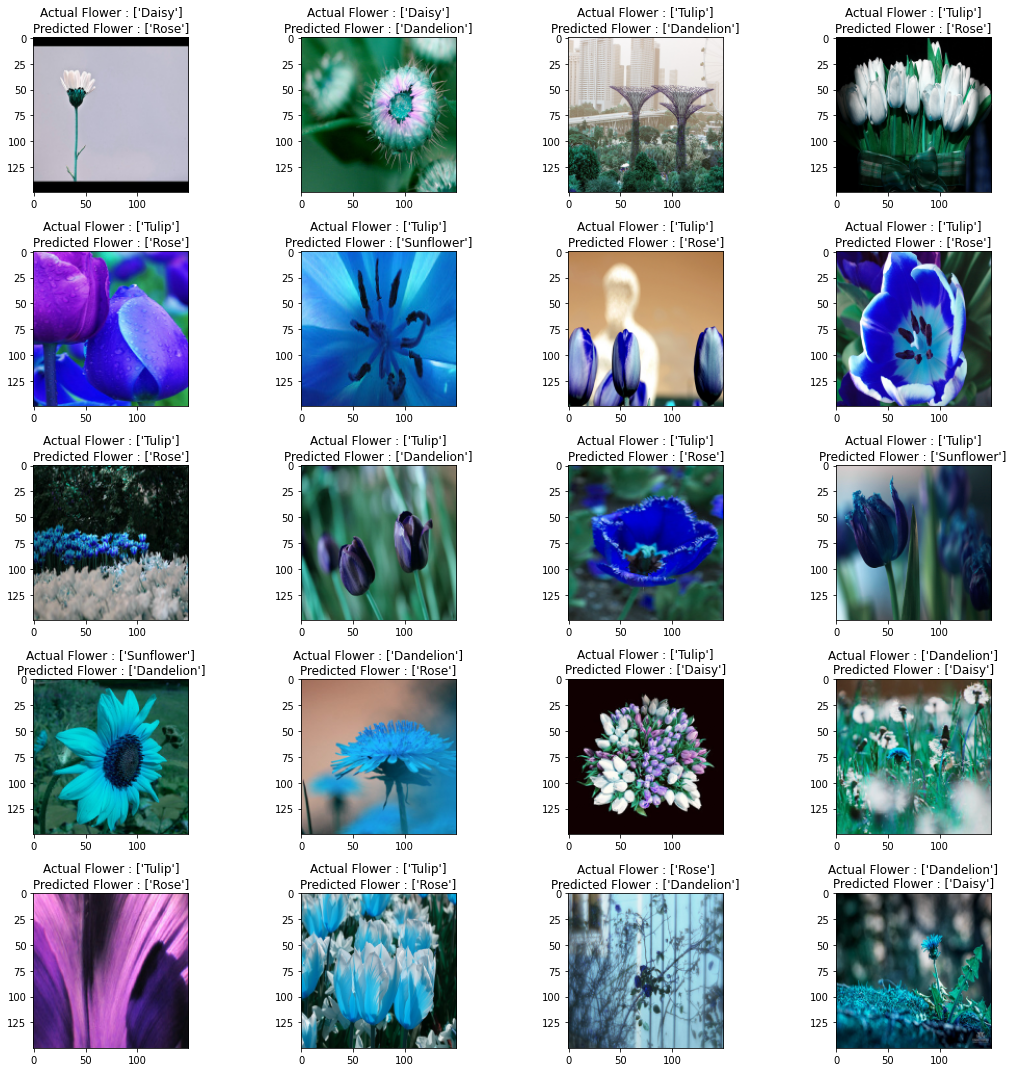

In [0]:
fig,ax = plt.subplots(num_classes,4)
fig.set_size_inches(15,15)
count = 0
for i in range (num_classes):
    for j in range (4):
        ax[i,j].imshow(X_test[incorr[count]])        
        ax[i,j].set_title("Actual Flower : "+str(encoder.inverse_transform([y_true[incorr[count]]])) +  "\n" + "Predicted Flower : "+str(encoder.inverse_transform([y_pred[incorr[count]]])))

        count+=1
        
plt.tight_layout()